In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import warnings
raw_data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv') 

K-Means clustering

In [2]:
#raw_data['species'].unique()
data = raw_data.replace('setosa', 0).replace('versicolor', 1).replace('virginica', 2) #for colour comparison

scaler=StandardScaler() #init of scaler to standardise/transform all various features into one scale
features_ = scaler.fit(data) #fit to data
features = features_.transform(data) #apply transformation to data
scaled = pd.DataFrame(features, columns = data.columns ) #question: did it need to be scaled if they are all in mm?
x = scaled.values

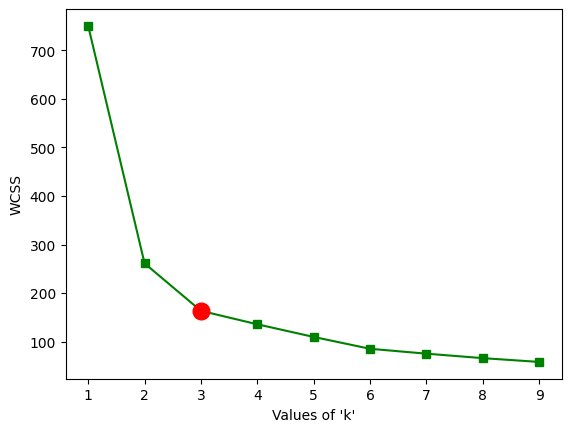

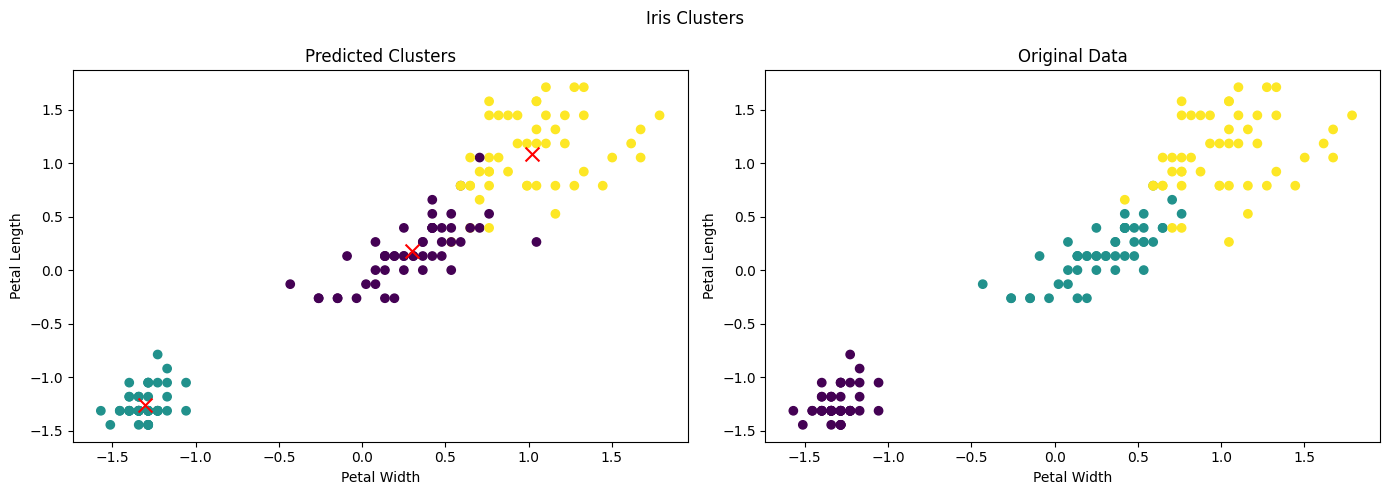

Silhouette score: 0.6333188008249331


In [9]:
warnings.simplefilter(action='ignore', category=FutureWarning)

wcss = [] #Within Cluster Sum of Squares
for i in range(1,10):
    kmeans_model = KMeans(n_clusters=i, random_state=20)
    kmeans_model.fit(x)
    wcss.append(kmeans_model.inertia_)

#print(wcss)

plt.plot([x for x in range(1,10)], wcss, 'gs-') #green solid
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.plot([3], [wcss[2]], 'ro', ms=12, mfc='r')
#plt.show()

#elbow at 3 clusters

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=20) #init k-means++ model 
kmeans.fit(x)
centres = kmeans.cluster_centers_

x_ = scaled[['petal_length', 'petal_width']].values
li = 2 #index of petal length in dataframe
wi = 3 #index of petal width 

lc = centres[:,li] #get all k centres
wc = centres[:,wi]


fig, (p1, p2) = plt.subplots(1, 2, figsize = (14,5))
fig.suptitle('Iris Clusters')
p1.scatter(x_[:,0], x_[:,1], c=kmeans.labels_)
p1.scatter(lc[:], wc[:], marker='x', s=100,c='red')
p1.set_xlabel('Petal Width')
p1.set_ylabel('Petal Length')
p1.set_title('Predicted Clusters')


p2.scatter(x_[:,0], x_[:,1], c=data['species'])
p2.set_xlabel('Petal Width')
p2.set_ylabel('Petal Length')
p2.set_title('Original Data')
plt.tight_layout()
plt.show()

from sklearn.metrics import silhouette_score
print (f'Silhouette score: {silhouette_score(x_, kmeans.labels_)}')

Principal Component Analysis (PCA)

[0.7659085298983744, 0.9501860992121757, 0.9874890410416868, 0.9959116354730707]


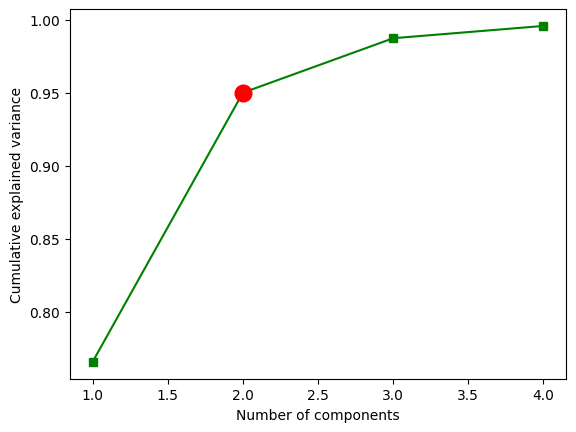

In [7]:
pca = PCA()
pca.fit(x)
cumulative_explained_variance = []
for i in range(1,5):
    cumulative_explained_variance.append(sum(pca.explained_variance_ratio_[:i]))
print(cumulative_explained_variance)
plt.plot([x for x in range(1,5)], cumulative_explained_variance, 'gs-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot([2], [cumulative_explained_variance[1]], 'ro', ms=12, mfc='r') # We will use 2 components for PCA as, although it doesn't have the highest cumulative explained variance, it means we can visualise the clusters in 2 dimensions.
plt.show()

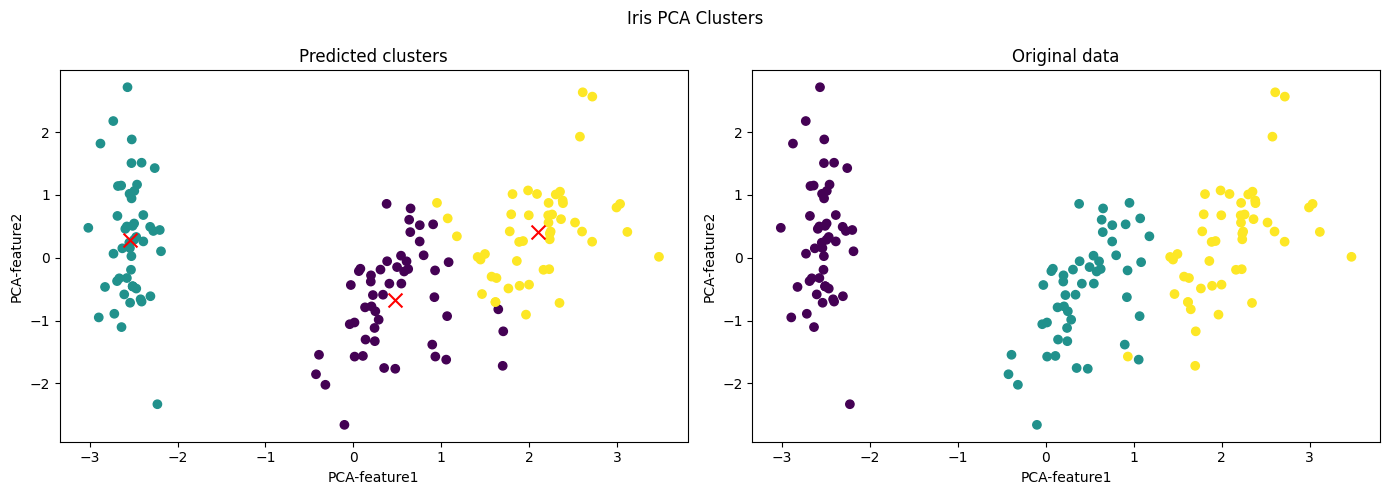

In [10]:
pca = PCA(n_components=2)
reduced_x = pd.DataFrame(data=pca.fit_transform(x.copy()), columns=['PCA-feature1', 'PCA-feature2'])
centres_pca=pca.transform(centres)

fig, (c1, c2) = plt.subplots(1,2, figsize=(14,5))
fig.suptitle('Iris PCA Clusters')
c1.scatter(reduced_x['PCA-feature1'], reduced_x['PCA-feature2'], c=kmeans.labels_)
c1.scatter(centres_pca[:,0], centres_pca[:,1], marker='x', s=100,c='red')
c1.set_xlabel('PCA-feature1')
c1.set_ylabel('PCA-feature2')
c1.set_title('Predicted clusters')
c2.scatter(reduced_x['PCA-feature1'], reduced_x['PCA-feature2'], c=data['species'])
c2.set_xlabel('PCA-feature1')
c2.set_ylabel('PCA-feature2')
c2.set_title('Original data')
plt.tight_layout()
plt.show()